In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import skimage, os
from skimage.morphology import ball, disk, dilation, binary_erosion, remove_small_objects, erosion, closing, reconstruction, binary_closing
from skimage.measure import label,regionprops, perimeter
from skimage.morphology import binary_dilation, binary_opening
from skimage.filters import roberts, sobel
from skimage import measure, feature
from skimage.segmentation import clear_border
from skimage import data
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import pydicom
import scipy.misc
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter
from glob import glob
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import svm, metrics
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops

In [2]:
#path="C:\\Users\\Omar-ElQady\\dicom\C\\"



In [3]:
A=glob('C:\\Users\\Omar-ElQady\\output\\A\\*.jpg')
B=glob('C:\\Users\\Omar-ElQady\\output\\B\\*.jpg')
C=glob('C:\\Users\\Omar-ElQady\\output\\D\\*.jpg')

In [4]:
print("the type of infected is {}, with length {}".format(type(A), len(A)))
print("the type of infected is {}, with length {}".format(type(B), len(B)))
print("the type of infected is {}, with length {}".format(type(C), len(C)))

the type of infected is <class 'list'>, with length 131
the type of infected is <class 'list'>, with length 121
the type of infected is <class 'list'>, with length 60


In [5]:
#defining the dataframe for the dataset
all_Data =[]
all_Data_labels = []
for i in range(len(A)):
  all_Data_labels.append('A')

for i in range(len(B)):
  all_Data_labels.append('B')

for i in range(len(C)):
  all_Data_labels.append('C')

all_Data = A + B + C

images_DataFrame = pd.DataFrame({
    "File": all_Data,
   "Label": all_Data_labels
})

images_DataFrame.info();
images_DataFrame.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   File    312 non-null    object
 1   Label   312 non-null    object
dtypes: object(2)
memory usage: 5.0+ KB


,File,Label
0,C:\Users\Omar-ElQady\output\A\A115224137.jpg,A
1,C:\Users\Omar-ElQady\output\A\A120469117.jpg,A
2,C:\Users\Omar-ElQady\output\A\A125793270.jpg,A
3,C:\Users\Omar-ElQady\output\A\A12631584.jpg,A
4,C:\Users\Omar-ElQady\output\A\A136583831.jpg,A


In [6]:
#spliting the data for training, testing and validation.
X_train, X_test, y_train, y_test = train_test_split(images_DataFrame['File'].values, 
                                                                      images_DataFrame['Label'].values,
                                                                      test_size=0.3,random_state=42 )

X_train, validation_data, y_train, validation_labels = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

#print("the size of train files is ", Counter(X-trian))
print("the size of train labels is ", Counter(y_train))
print("the size of test labels is ", Counter(y_test))
print("the size of val labels is ", Counter(validation_labels))

print("train files shape: ",X_train.shape)
print("train val shape: ",validation_data.shape)
print("train test shape: ",X_test.shape)

the size of train labels is  Counter({'B': 78, 'A': 78, 'C': 40})
the size of test labels is  Counter({'A': 42, 'B': 38, 'C': 14})
the size of val labels is  Counter({'A': 11, 'C': 6, 'B': 5})
train files shape:  (196,)
train val shape:  (22,)
train test shape:  (94,)


In [7]:
import cv2

#reshaping validation data
temp =[]
for img in validation_data:
    img = cv2.imread(img)
    img = cv2.resize(img, dsize=(125,125))
    img = np.array(img, dtype=np.float32)
    temp.append(img)
    
validation_data = np.array(list(temp))

print("done")
print("the validation data shape is ", validation_data.shape)

done
the validation data shape is  (22, 125, 125, 3)


In [8]:
#reshaping testing data
temp=[]
for img in X_test:
    img = cv2.imread(img)
    img = cv2.resize(img, dsize=(125,125))
    img = np.array(img, dtype=np.float32)
    temp.append(img)
testing_data = np.array(list(temp))
print("Done")
print("test Data Shape is ", testing_data.shape)

Done
test Data Shape is  (94, 125, 125, 3)


In [9]:
#resizing the training data
temp=[]
for img in X_train:
    img = cv2.imread(img);
    img = cv2.resize(img, dsize=(125,125))
    img = np.array(img, dtype=np.float32)
    temp.append(img)
    

training_data = np.array(list(temp))
print("Done")
print("Training Data Shape is ", training_data.shape)


Done
Training Data Shape is  (196, 125, 125, 3)


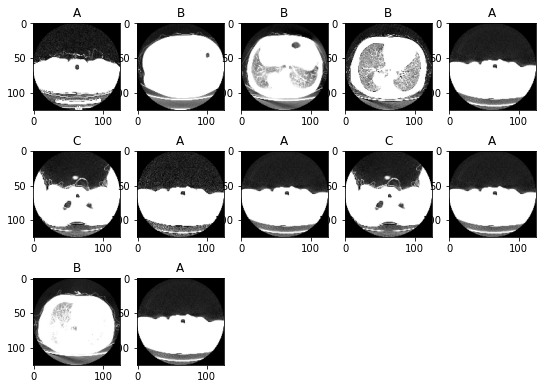

In [10]:
#view sample of the cell images data.
plt.figure(figsize = (9,9))
number = 0
for counter in range(12):
    number += 1
    r = np.random.randint(0 , 30 , 1)
    plt.subplot(4 , 5 ,number)
    plt.imshow(training_data[r[0]]/255)
    plt.title('{}'.format(y_train[r[0]]))

In [11]:
#data before scale
print(validation_data.shape)
print(validation_data[0][9])

(22, 125, 125, 3)
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 1.  1.  1.]
 [28. 28. 28.]
 [24. 24. 24.]
 [18. 18. 18.]
 [19. 19. 19.]
 [25. 25. 25.]
 [23. 23. 23.]
 [23. 23. 23.]
 [36. 36. 36.]
 [ 3.  3.  3.]
 [12. 12. 12.]
 [24. 24. 24.]
 [18. 18. 18.]
 [16. 16. 16.]
 [18. 18. 18.]
 [19. 19. 19.]
 [27. 27. 27.]
 [13. 13. 13.]
 [ 0.  0.  0.]
 [26. 26. 26.]
 [11. 11. 11.]
 [33. 33. 33.]
 [19. 19. 19.]
 [15. 15. 15.]
 [17. 17. 17.]
 [13. 13. 13.]
 [30. 30. 30.]
 [17. 17. 17.]
 [10. 10. 10.]
 [16. 16. 16.]
 [14. 14. 14.]
 [15. 15. 15.]
 [32. 32. 32.]
 [26. 26. 26.]
 [22. 22. 22.]
 [25. 25. 25.]
 [33. 33. 33.]
 [29. 2

In [12]:
#divided by 255 to get number between 0 and 1.
training_imags_divided = training_data/255
testing_images_divided = testing_data/255
validation_images_divided = validation_data/255

#set data between 1 and 3
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler(feature_range=(1,3))
#training_imags_divided = scaler.fit_transform(training_data.reshape(-1, training_data.shape[-1])).reshape(training_data.shape)
#testing_images_divided = scaler.transform(testing_data.reshape(-1, testing_data.shape[-1])).reshape(testing_data.shape)
#validation_images_divided = scaler.transform(validation_data.reshape(-1, validation_data.shape[-1])).reshape(validation_data.shape)


In [13]:
print(validation_images_divided.shape)
print(validation_images_divided[0][9])

(22, 125, 125, 3)
[[0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.      

In [14]:
my_dict = {'A': 1, 'B': 2, 'C': 3}

y_train_transformed= [my_dict[zi] for zi in y_train]
y_train_transformed = np.array(list(y_train_transformed))

y_test_transformed= [my_dict[zi] for zi in y_test]
y_test_transformed = np.array(list(y_test_transformed))

validation_labels_transformed= [my_dict[zi] for zi in validation_labels]
validation_labels_transformed = np.array(list(validation_labels_transformed))

In [15]:
print(validation_labels_transformed[:10])
print(validation_labels[:10])

print(type(y_test_transformed))
print(y_test_transformed.shape)

print(y_test_transformed)

[1 1 1 2 3 2 1 1 1 3]
['A' 'A' 'A' 'B' 'C' 'B' 'A' 'A' 'A' 'C']
<class 'numpy.ndarray'>
(94,)
[2 1 1 1 1 1 1 2 3 1 1 2 2 1 2 3 1 2 2 3 1 3 2 2 1 2 2 1 3 3 2 1 1 3 2 2 1
 1 2 2 1 1 2 1 2 3 3 1 3 1 1 2 1 1 1 2 2 2 2 2 2 1 1 1 2 2 2 1 2 1 2 1 2 1
 1 3 1 3 1 3 2 2 2 2 1 2 1 1 2 3 1 2 1 1]


In [16]:
dataset_size = len(training_imags_divided)
training_imags_divided = training_imags_divided.reshape(dataset_size,-1)

dataset_size = len(testing_images_divided)
testing_images_divided = testing_images_divided.reshape(dataset_size,-1)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(training_imags_divided, y_train_transformed)

KNeighborsClassifier(n_neighbors=3)

In [18]:
# Predicted class
Predicted=neigh.predict(testing_images_divided)

In [19]:
Accuracy = metrics.accuracy_score(y_test_transformed, Predicted)
print('Accuracy: {0:.2f}'.format(Accuracy))

Accuracy: 1.00


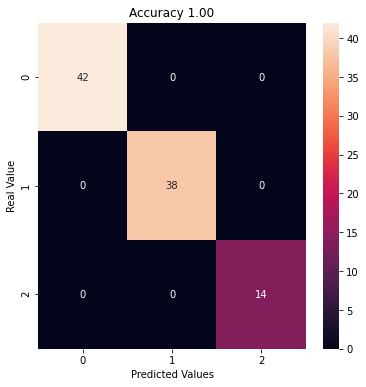

In [20]:
#showing the confusion matrix

Confusion_Mtrx = metrics.confusion_matrix(y_test_transformed, Predicted)
#true_positive , false_positive, false_negative, true_negative = Confusion_Mtrx.ravel()

plt.figure(figsize=(6,6))
sns.heatmap(Confusion_Mtrx, annot=True, fmt=".0f");
plt.ylabel('Real Value');
plt.xlabel('Predicted Values');
plt.title('Accuracy {0:.2f}'.format(Accuracy));
